In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,normalize
from sklearn.metrics import mean_squared_error
from sklearn import metrics, preprocessing

1) Import dataset

In [16]:
df= pd.read_csv('dataSet_diamondPrice.csv')

Inspect data

In [17]:
df.head(5)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [240]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [95]:
df.corr()

,Carat Weight,Price
Carat Weight,1.000000,0.858562
Price,0.858562,1.000000


In [241]:
#change all categorical variables to numerical
df2= pd.get_dummies(df)
X= df2.drop(['Price'],axis=1)
Y=df2['Price']
features= X.columns

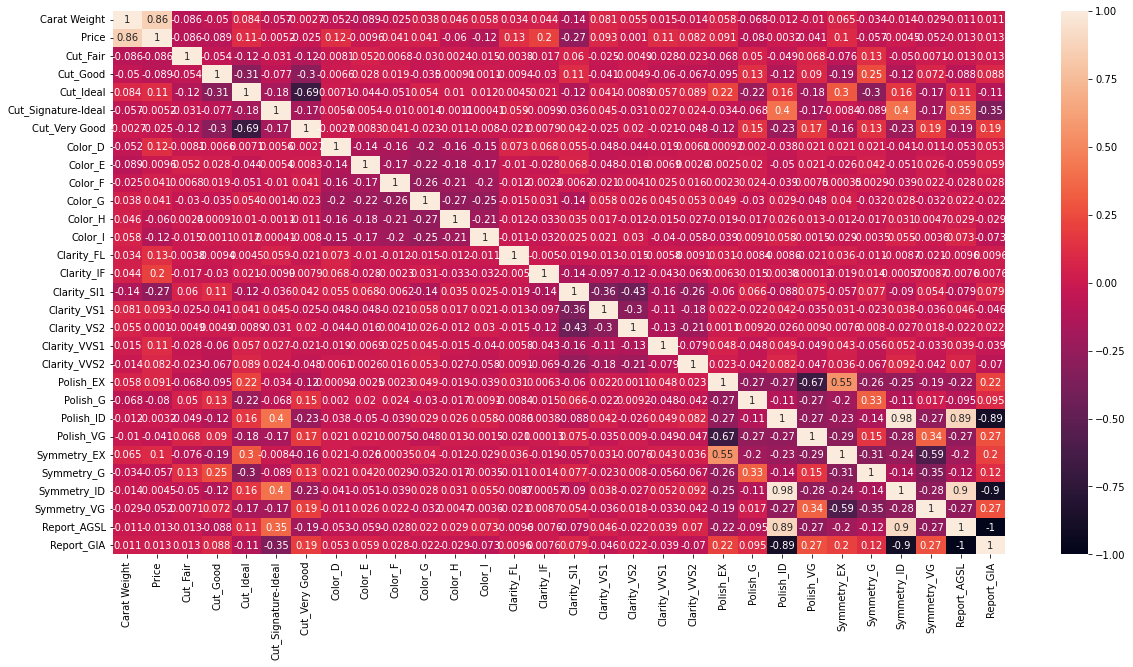

In [100]:
#use heatmap to show correlation between variables
plt.figure(figsize=(20,10))
sb.heatmap(df2.corr(),annot=True);

In [242]:
#scale data
s=StandardScaler()
X=s.fit_transform(X)

In [243]:
#split dataset to get training set and test set
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size= 0.4,random_state=100)

Prediction and Model Evaluation

In [244]:
#create dataframe to hold results
Evaluate= pd.DataFrame(index=['Null', 'KNN', 'Lin'], columns=['RMSE'])

In [245]:
#create a prediction baseline using simple mean
Pred= Y_train.mean()

KNN

In [246]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=7)

In [248]:
PredY= knn.predict(X_test)

Linear Regression

In [249]:
lm= LinearRegression()
lm= lm.fit(X_train,Y_train)
Pred2= lm.predict(X_test)

In [250]:
Evaluate= pd.DataFrame(index=['Null', 'KNN', 'Lin'], columns=['RMSE'])
Evaluate.loc['KNN','RMSE']= np.sqrt(mean_squared_error(Y_test,PredY))
Evaluate.loc['Lin','RMSE']= np.sqrt(mean_squared_error(Y_test,Pred2))
Evaluate.loc['Null','RMSE']=Pred        
Evaluate

,RMSE
Null,11843.793889
KNN,6017.414333
Lin,3724.495555


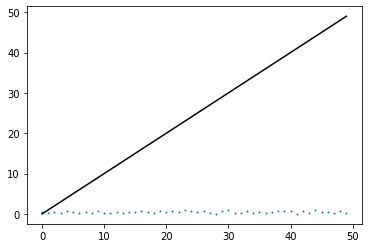

In [251]:
#plot graph to see if there is any linear relationship exists
Y_test = np.arange(50)
Pred= np.random.rand(50)
plt.scatter(Y_test,Pred, s=1)
plt.plot(Y_test, Y_test, color='black')
#no linear relationship established, change in variables does not have any impact on the change in prices 

LINEAR REGRESSION

In [278]:
df['Price'].skew()

2.3145211869537796

In [279]:
df['Carat Weight'].skew()

0.8912169546370495

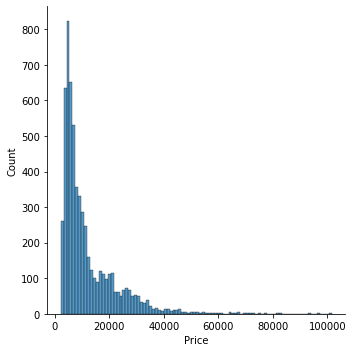

In [257]:
sb.displot(df['Price'])

skewness is 0.5209091210539053


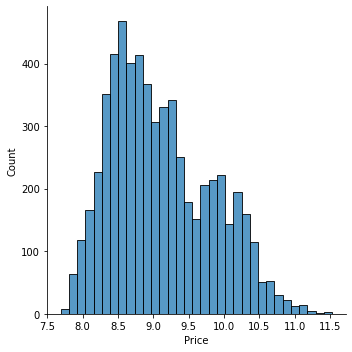

In [258]:
# Log transform skewed data
target= np.log(df['Price'])
print ('skewness is' , target.skew())
sb.displot(target)

skewness is 0.511329719678615


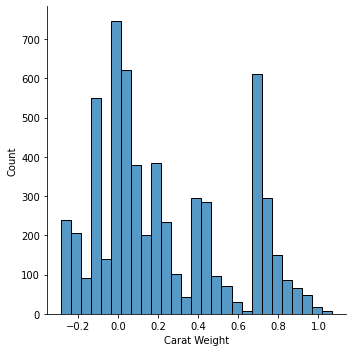

In [259]:
# Log transform skewed data
target= np.log(df['Carat Weight'])
print ('skewness is' , target.skew())
sb.displot(target)

Log transform the dataframe to normalize data

In [260]:
df2= df[['Carat Weight','Price']].apply(lambda x: np.log(x))

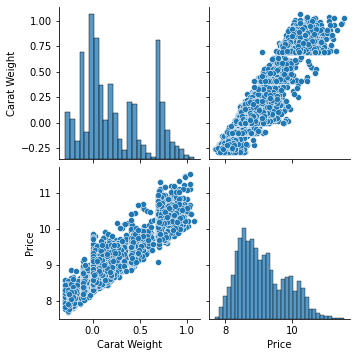

In [261]:
sb.pairplot(df2)

Reshape Data before training and testing because it is a single linear regression and has one variable

In [292]:
x=df[['Carat Weight']]
print (x)
print(type(x))
print (x.shape)
print(x.index)
y=df['Price']

      Carat Weight
0             1.10
1             0.83
2             0.85
3             0.91
4             0.83
...            ...
5995          1.03
5996          1.00
5997          1.02
5998          1.27
5999          2.19

[6000 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
(6000, 1)
RangeIndex(start=0, stop=6000, step=1)


In [315]:
#split dataset to select train set and test set
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size= 0.4, random_state=100)

In [316]:
x_train.head()

,Carat Weight
5177,1.15
5298,2.15
2338,1.02
0,1.10
4844,1.00


In [317]:
lm=LinearRegression()

In [318]:
lm.fit(x_train,y_train)

LinearRegression()

Calculate the slope and Intercept

In [297]:
print(lm.intercept_)

-12809.662456811668


In [298]:
print(lm.coef_)

[18464.54963228]


In [299]:
Predict_Diamond_Prices= lm.predict(x_test)

Text(0, 0.5, 'Predicted prices')

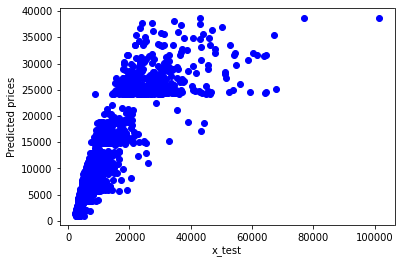

In [300]:
plt.scatter(y_test,Predict_Diamond_Prices, color='blue')
plt.xlabel('x_test')
plt.ylabel('Predicted prices')

Evaluate Model with R Squared, Root Mean Square Error(RMSE) and Mean Absolute Error(MAE)

In [301]:
R_Squared= lm.score(x_test,y_test)
print (R_Squared)

0.7433060209015181


In [303]:
MAE = metrics.mean_absolute_error(y_test,Predict_Diamond_Prices)
print(MAE)

2916.0040777840613


In [304]:
metrics.mean_squared_error(y_test,Predict_Diamond_Prices)

25385920.165757317

In [305]:
RMSE= np.sqrt(metrics.mean_squared_error(y_test,Predict_Diamond_Prices))
print (RMSE)

5038.444220764711


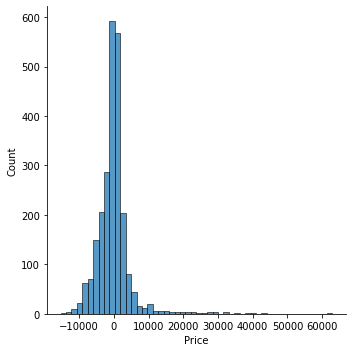

In [306]:
sb.displot((y_test-Predict_Diamond_Prices),bins=50)

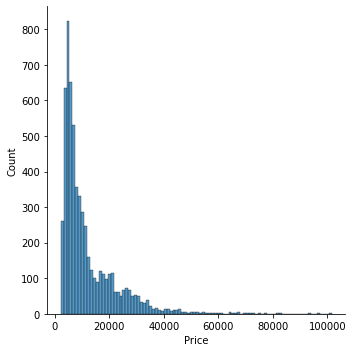

In [92]:
sb.displot(df['Price'])

In [307]:
Eva= pd.DataFrame(index=['R_Squared','MAE', 'RMSE'], columns=['stats'])
Eva.loc['R_squared','stats']=  lm.score(x_test,y_test)
Eva.loc['MAE','stats']= metrics.mean_absolute_error(y_test,Predict_Diamond_Prices)
Eva.loc['RMSE', 'stats']= np.sqrt(metrics.mean_squared_error(y_test,Predict_Diamond_Prices))     
Eva

,stats
R_Squared,NaN
MAE,2916.004078
RMSE,5038.444221
R_squared,0.743306


In [310]:
import statsmodels.api as sm
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                          1.522e+04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        0.00
Time:                        08:08:33   Log-Likelihood:                         -36916.
No. Observations:                3600   AIC:                                  7.383e+04
Df Residuals:                    3599   BIC:                                  7.384e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------